<a href="https://colab.research.google.com/github/eletorres/MachineLearning/blob/main/KNN_Predict_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN - the morphologic variation of Iris *flowers*

---

#### Estudiante: Luis Torres
#### Curso: Machine Learning

# Descripción del problema

La siguiente tarea tiene por finalidad clasificar flores tipo iris a partir de aprendizaje automatico, para esto se debe desarrollar el algoritmo KNN. En internet, se puede encontrar rápidamente la base de datos de este tipo de flores, las cuales han sido clasificadas en 3 especies (VersiColor, Setosa y Virginica). En cada una de estás especies se han considerado 4 características (longitud y ancho del sépalo y pétalo).

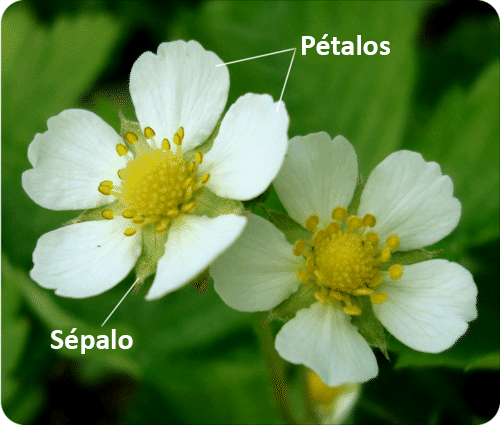


El algoritmo escogido, es uno de los que se suele utilizar para comenzar en el mundo del aprendizaje automático. KNN, es un clasificador útil siempre y cuando, la base de datos no sea extensa, en caso contrario será poco eficiente. La forma de operar de este algoritmo es midiendo la distancia que existe entre los vecinos. En computación, existen muchas formas de medir las distancias, por lo que en este trabajo se verá la influencia que puede tener el escoger una distancia euclidiana por sobre una manhattan por ejemplo. A su vez, para este algoritmo se debe escoger un valor K, el cual dependerá de los datos. En diferentes literaturas se habla de un valor mayor a 5 y menor a 20, pero también se hace mención a utilizar el valor de la raíz cuadrada del total de datos a analizar, por lo que se ha decidido de igual forma, estudiar la influencia de la selección de este valor, cabe destacar que el valor debe ser un número entero.

El flujo de trabajo es el siguiente:







*   Cargar base de datos
*   Preprocesar los datos, generando datos de entrenamiento y para la prueba del rendimiento del algoritmo.
* Escoger el valor de K y la forma en que se medirá la distancia entre los datos.
* Entrenar el modelo.
*Evaluar el modelo.

El trabajo presentado ha sido divido en 3 secciones: Código utilizado considerando K como $\sqrt N$, donde $N$ es el número de datos y considerando la distancia como euclidiana, en la sección 2, se ve la influencia de K y en la sección 3 se ve la influencia de la distancia escogida.



# Código utilizado

Librerias necesarias para resolver el problema


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score


Importación de base de datos para aplicar machine learning

In [ ]:
import seaborn as sns
dataset = sns.load_dataset('iris')
len(dataset)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Replace zeroes
zero_not_accepted = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

Preprocesamiento de Datos. Se separan las primeras 4 columnas que continen datos numéricos y la última columna que contiene las etiquetas y también se separan los datos de entrenamiento con lo datos que serviran para evaluar el algoritmo.


In [ ]:
# split dataset
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

120
120
30
30


In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Se debe escoger el valor de K, en esté caso se ha escogido el valor aproximado de la raíz de la cantidad total de datos

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(dataset))), p=2,metric='euclidean')


In [ ]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

Resultados: Evaluación del modelo

In [ ]:
# Evaluación del modelo
print (confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Precisión del modelo',accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precisión del modelo 1.0


# **Influencia de K en el error del modelo**



In [ ]:
error = []

# Calcular el error de K considerando valores entre 1 y 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error')

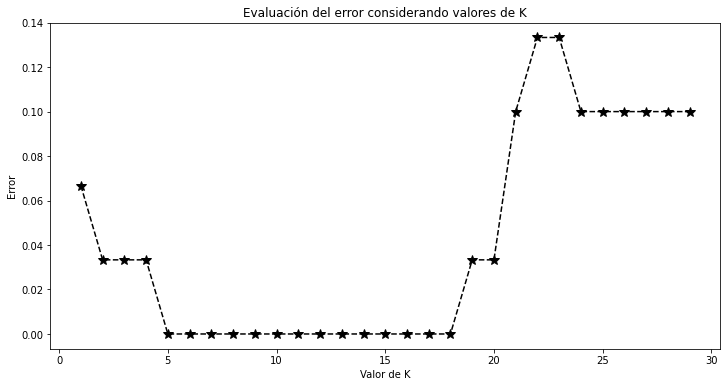

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='black', linestyle='dashed', marker='*',
         markerfacecolor='black', markersize=10)
plt.title('Evaluación del error considerando valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Error')

De acuerdo a la figura de influencia en el valor de K, es que se puede comprobar que efectivamente, es un buen valor de K considerar la raíz de los N datos del problema.

Para este caso, considerando que hay 150 datos, el valor ideal para K es:

\begin{equation}
K=\sqrt N=\sqrt {150} \approx 12.25
\end{equation}

Si se analiza el gráfico, este numéro se encuentra en la zona donde nuestro modelo tendrá el menor error en la solución. 

# **Influencia de la distancia que se esta midiendo entre los vecinos**

Para saber en detalle como se calculan las distintas distancias, visitar la página:

 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [ ]:
medida=['euclidean','manhattan','chebyshev','minkowski']
for med in medida:
  print('Considerando la medida',med)
  classifier= KNeighborsClassifier(n_neighbors=12,metric=str(med))
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  #print (confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  print("{0:.2f}".format(accuracy_score(y_test, y_pred)))
  



Considerando la medida euclidean
1.00
Considerando la medida manhattan
1.00
Considerando la medida chebyshev
0.97
Considerando la medida minkowski
1.00


Conclusión: Para este problema, la única medida que presenta valores distintos en los resultados es la de chebyshev, la cual empeora la precisión del algoritmo. Por otra parte, la selección del valor de K como $\sqrt N$ es una buena estrategía, al menos para este problema.